In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from prophet import Prophet

ERROR:prophet.plot:Importing plotly failed. Interactive plots will not work.


In [2]:
def get(category):
    df = pd.read_csv('household.csv', sep=",", parse_dates = ['Date'])
    df[category] = pd.to_numeric(df[category], errors='coerce')
    df = df.sort_values(by="Date")
    df = df.groupby(['Date']).sum().reset_index()
    df = df.rename(columns={"Date": "ds", category: "y"})
    df.plot(x="ds", y="y")
    return df

In [3]:
def predict(df):
    # Model fit
    m = Prophet(yearly_seasonality=True, daily_seasonality=False)
    m.fit(df) # Fit the Prophet model.
    # Predict
    # Make future date data frame for the next 365 days (it gives daily because it follows          the frequency in input dataframe by default).
    future = m.make_future_dataframe(periods=30)
    forecast = m.predict(future) # Predict future value.
    fig2 = m.plot_components(forecast) # Plot breakdown of components.
    plt.show()
    return m

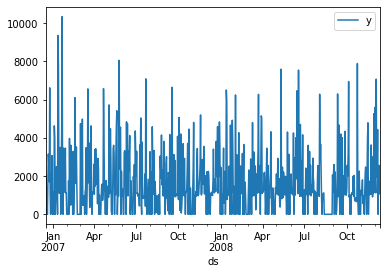

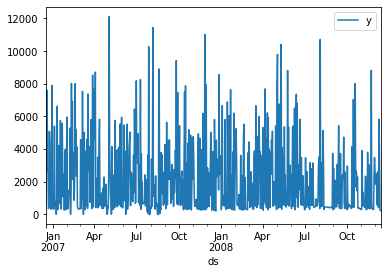

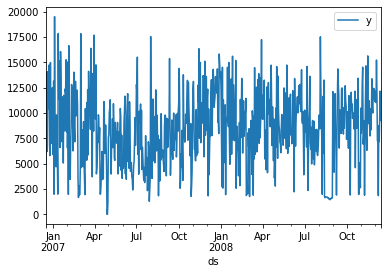

In [4]:
df1 = get("Sub_metering_1") # Kitchen, dishwasher
df2 = get("Sub_metering_2") # Laundry room, washing-machine 
df3 = get("Sub_metering_3") # Water-heater, air-conditioner 


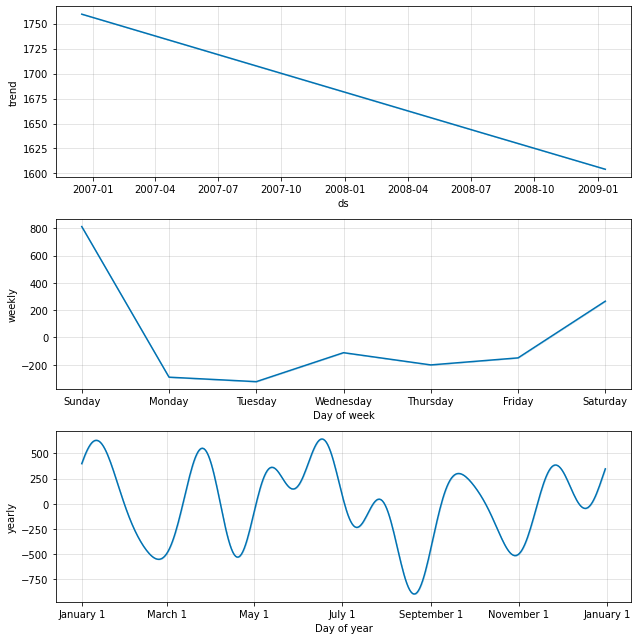

In [5]:
predict(df1)

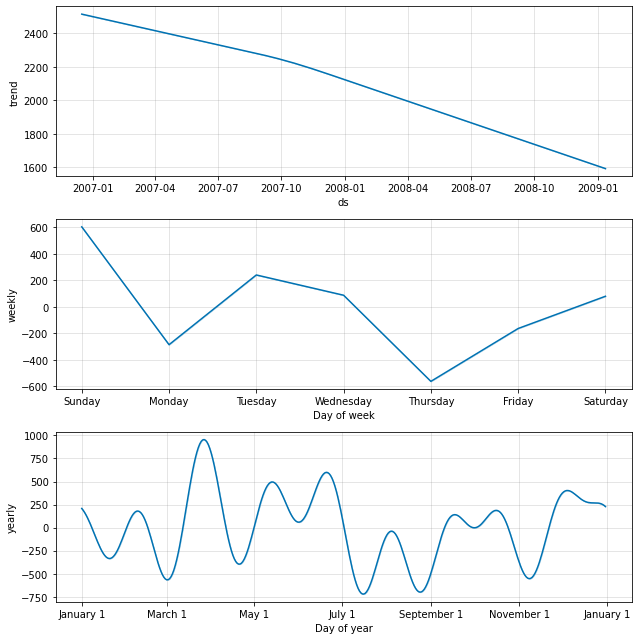

In [6]:
predict(df2)

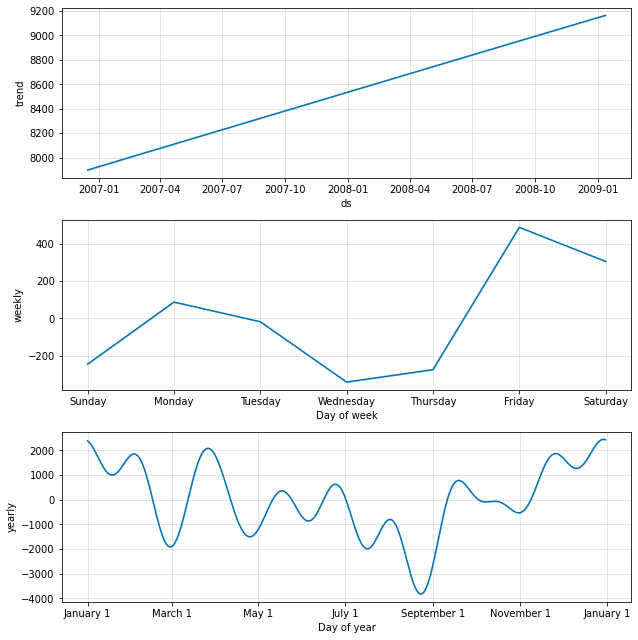

In [7]:
predict(df3)

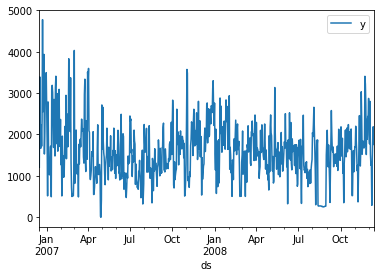

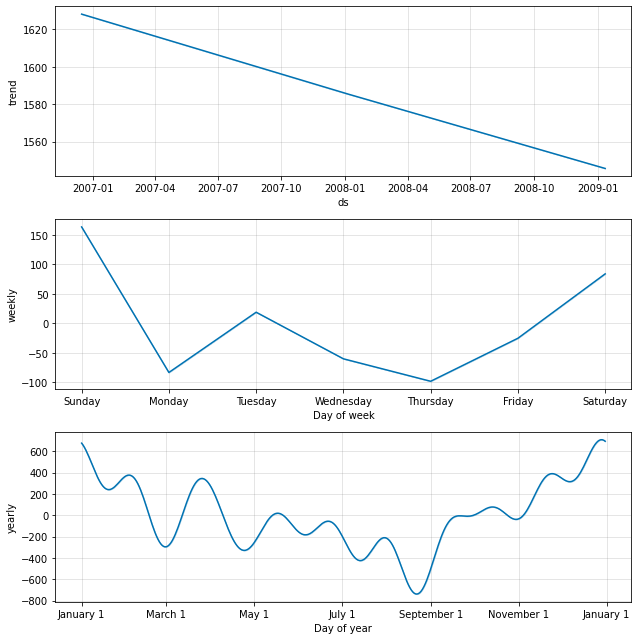

In [8]:
df5 = get("Global_active_power")
predict(df5)